<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Defining-model" data-toc-modified-id="Defining-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Defining model</a></span><ul class="toc-item"><li><span><a href="#Creating-a-basic-model" data-toc-modified-id="Creating-a-basic-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Creating a basic model</a></span></li></ul></li><li><span><a href="#Compiling-model" data-toc-modified-id="Compiling-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compiling model</a></span></li><li><span><a href="#Model-fitting" data-toc-modified-id="Model-fitting-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model fitting</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Model-testing" data-toc-modified-id="Model-testing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model testing</a></span></li><li><span><a href="#Saving-the-model" data-toc-modified-id="Saving-the-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Saving the model</a></span></li></ul></div>

# Imports

In [241]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Data preprocessing

In [272]:
data_path = 'dataset/sudoku.csv'
full_df = pd.read_csv(data_path)
print(df.shape)
partial_df = full_df[:500]

(1000000, 2)


In [273]:
partial_df.head()

,quizzes,solutions
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...


In [274]:
example = partial_df.values[0]
#print(example[0])
print("Quiz:")
for i in range(9):
    output = str(example[0][9*i : 9*(i+1)])
    # replacing 0 with x to represent nicely
    print(output.replace('0', 'x').replace('', ' '))

print("Solution:")
for i in range(9):
    output = str(example[1][9*i : 9*(i+1)])
    print(output.replace('0', 'x').replace('', ' '))

Quiz:
 x x 4 3 x x 2 x 9 
 x x 5 x x 9 x x 1 
 x 7 x x 6 x x 4 3 
 x x 6 x x 2 x 8 7 
 1 9 x x x 7 4 x x 
 x 5 x x 8 3 x x x 
 6 x x x x x 1 x 5 
 x x 3 5 x 8 6 9 x 
 x 4 2 9 1 x 3 x x 
Solution:
 8 6 4 3 7 1 2 5 9 
 3 2 5 8 4 9 7 6 1 
 9 7 1 2 6 5 8 4 3 
 4 3 6 1 9 2 5 8 7 
 1 9 8 6 5 7 4 3 2 
 2 5 7 4 8 3 9 1 6 
 6 8 9 7 3 4 1 2 5 
 7 1 3 5 2 8 6 9 4 
 5 4 2 9 1 6 3 7 8 


In [275]:
# converting the input into numpy 2d array
no_examples = partial_df.shape[0]

def transform_data_into_array(series):
    str_series = str(series)
    np_arr = np.array([int(x) for x in list(str_series)], dtype=np.int64)
    return np.asarray(np_arr.reshape((81,)))

X = np.asarray(np.zeros((no_examples, 81,), dtype=np.int64))
Y = np.asarray(np.zeros((no_examples, 81,), dtype=np.int64))

for i in range(no_examples):
    series = df.loc[i]
    X[i] = transform_data_into_array(series[0])
    Y[i] = transform_data_into_array(series[1])

print(X[0])
print(Y[0])
print(type(X))
print(type(X[0]))

[0 0 4 3 0 0 2 0 9 0 0 5 0 0 9 0 0 1 0 7 0 0 6 0 0 4 3 0 0 6 0 0 2 0 8 7 1
 9 0 0 0 7 4 0 0 0 5 0 0 8 3 0 0 0 6 0 0 0 0 0 1 0 5 0 0 3 5 0 8 6 9 0 0 4
 2 9 1 0 3 0 0]
[8 6 4 3 7 1 2 5 9 3 2 5 8 4 9 7 6 1 9 7 1 2 6 5 8 4 3 4 3 6 1 9 2 5 8 7 1
 9 8 6 5 7 4 3 2 2 5 7 4 8 3 9 1 6 6 8 9 7 3 4 1 2 5 7 1 3 5 2 8 6 9 4 5 4
 2 9 1 6 3 7 8]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [276]:
augmented_df = pd.DataFrame(columns=['quiz','solution'])
no_of_ex = X.shape[0]
for i in range(no_of_ex):
    game = X[i].copy()
    for j in range(81):
        if game[j] == 0:
            solution=Y[i][j]
            augmented_df=augmented_df.append([{'quiz':game.copy().tolist(),'solution':solution}])
            game[j]=solution

In [277]:
display(augmented_df.head())

,quiz,solution
0,"[0, 0, 4, 3, 0, 0, 2, 0, 9, 0, 0, 5, 0, 0, 9, ...",8
0,"[8, 0, 4, 3, 0, 0, 2, 0, 9, 0, 0, 5, 0, 0, 9, ...",6
0,"[8, 6, 4, 3, 0, 0, 2, 0, 9, 0, 0, 5, 0, 0, 9, ...",7
0,"[8, 6, 4, 3, 7, 0, 2, 0, 9, 0, 0, 5, 0, 0, 9, ...",1
0,"[8, 6, 4, 3, 7, 1, 2, 0, 9, 0, 0, 5, 0, 0, 9, ...",5


In [278]:
X_aug=augmented_df['quiz'].values
y_aug=augmented_df['solution'].values
X_train, X_test, y_train, y_test = train_test_split(X_aug, y_aug, test_size = 0.05, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train[0]))
print(type(y_train))
print(X_train[0])
print(y_train[0])
print(X_train[1])

(22439,)
(22439,)
(1182,)
(1182,)
<class 'list'>
<class 'numpy.ndarray'>
[0, 0, 4, 3, 0, 0, 2, 0, 9, 0, 0, 5, 0, 0, 9, 0, 0, 1, 0, 7, 0, 0, 6, 0, 0, 4, 3, 0, 0, 6, 0, 0, 2, 0, 8, 7, 1, 9, 0, 0, 0, 7, 4, 0, 0, 0, 5, 0, 0, 8, 3, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 5, 0, 0, 3, 5, 0, 8, 6, 9, 0, 0, 4, 2, 9, 1, 0, 3, 0, 0]
8
[8, 0, 4, 3, 0, 0, 2, 0, 9, 0, 0, 5, 0, 0, 9, 0, 0, 1, 0, 7, 0, 0, 6, 0, 0, 4, 3, 0, 0, 6, 0, 0, 2, 0, 8, 7, 1, 9, 0, 0, 0, 7, 4, 0, 0, 0, 5, 0, 0, 8, 3, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 5, 0, 0, 3, 5, 0, 8, 6, 9, 0, 0, 4, 2, 9, 1, 0, 3, 0, 0]


In [279]:
one_hot_encoder=OneHotEncoder(sparse=False, dtype=int)
y_train_cat = one_hot_encoder.fit_transform(y_train.reshape(-1,1))
print(y_train_cat.shape)

(22439, 9)


In [280]:
print(y_train_cat[0])
print(type(y_train_cat))
display(y_train_cat.tolist())

[0 0 0 0 0 0 0 1 0]
<class 'numpy.ndarray'>


[[0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0,

In [ ]:
import multiprocessing as mp

def get_augmented_data(X, y):
    augmented_df = pd.DataFrame(columns=['quiz','solution'])
    no_of_example = X.shape[0]
    for i in range(no_of_example):

    if i%10000 == 0:
        augmented_df.to_csv('augmented_data_'+str(i)+'.csv')
        augmented_df = pd.DataFrame(columns=['quiz','solution'])
    
    game = X[i].copy()
    for j in range(81):
        if game[j] == 0:
            sol = y[i][j]
            augmented_df=augmented_df.append([{'quiz':game.copy().tolist(), 'solution':sol}])
            game[j]=sol
    return augmented_df
    

augmented_full_df = pd.DataFrame(columns=['quiz','solution'])
with mp.Pool(8) as pool:
    result = pool.imap(augment_data, partial_df.itertuples(index=False, name=None), chunksize=2000)
    augmented_full_df=augmented_full_df.append([{'quiz':result[0], 'solution':result[1]}])

# Defining model

## Creating a basic model

Model has 3 hidden layers of 100 nodes each. Input has 81(9x9) nodes input and output is also of 81 nodes.

In [282]:
model = Sequential()
model.add(Dense(81, name='Hidden_Layer_1', activation = 'relu', kernel_initializer = 'he_normal', input_dim=81))
model.add(Dense(81, name='Hidden_layer_2', activation='relu', kernel_initializer='he_normal'))
model.add(Dense(9, name='output_layer', activation = 'softmax'))

In [283]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 81)                6642      
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 81)                6642      
_________________________________________________________________
output_layer (Dense)         (None, 9)                 738       
Total params: 14,022
Trainable params: 14,022
Non-trainable params: 0
_________________________________________________________________


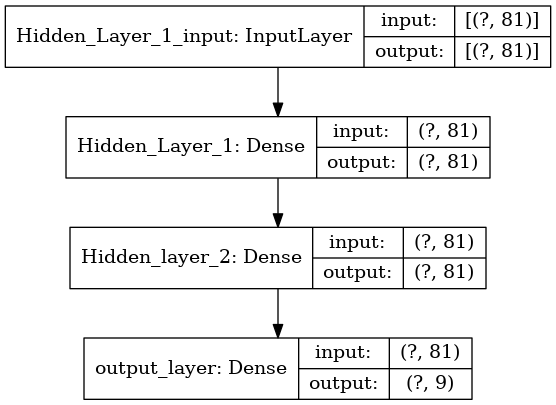

In [284]:
plot_model(model, 'model1.png', show_shapes=True)

# Compiling model

In [285]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Model fitting

In [110]:
es = EarlyStopping(monitor = 'val_accuracy', patience = 5)

In [ ]:
history = model.fit(X_train.tolist(), y_train_cat.tolist(), epochs = 100000, batch_size = 32, verbose = 0)

# Model Evaluation

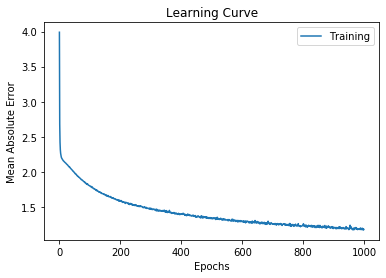

{'loss': [3.990020275115967, 2.68152117729187, 2.4221668243408203, 2.315892219543457, 2.2638814449310303, 2.235051393508911, 2.213923454284668, 2.1996095180511475, 2.1916940212249756, 2.184283971786499, 2.1759753227233887, 2.1697170734405518, 2.164994478225708, 2.15692138671875, 2.154447078704834, 2.149024248123169, 2.143832206726074, 2.139767646789551, 2.136089563369751, 2.130643129348755, 2.128200054168701, 2.1238677501678467, 2.1189215183258057, 2.1138834953308105, 2.109060525894165, 2.1047534942626953, 2.102796792984009, 2.096778631210327, 2.090040445327759, 2.085932970046997, 2.08249568939209, 2.0777266025543213, 2.070600986480713, 2.073158025741577, 2.0640296936035156, 2.0611929893493652, 2.0532844066619873, 2.0487120151519775, 2.0457582473754883, 2.041006326675415, 2.033984661102295, 2.0302491188049316, 2.02732515335083, 2.0205273628234863, 2.0138237476348877, 2.007143259048462, 2.0069634914398193, 2.0027029514312744, 1.9949390888214111, 1.9905909299850464, 1.9861729145050049, 1

In [264]:
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Categorical CrossEnropy error')
plt.plot(history.history['loss'])
plt.show()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'])
plt.show()

#print(history.history)

In [270]:
y_test_cat = one_hot_encoder.transform(y_test.reshape((-1,1)))
loss, acc = model.evaluate(X_test.tolist(), y_test_cat.tolist(), batch_size=32, verbose=0)
print(acc)

0.12236286699771881


# Model testing

In [271]:
print(X[0].shape)
print(X[0])
y_pred = model.predict_classes(X[0].reshape((1,81)))
print(Y[0])
print(y_pred)

(81,)
[0 0 4 3 0 0 2 0 9 0 0 5 0 0 9 0 0 1 0 7 0 0 6 0 0 4 3 0 0 6 0 0 2 0 8 7 1
 9 0 0 0 7 4 0 0 0 5 0 0 8 3 0 0 0 6 0 0 0 0 0 1 0 5 0 0 3 5 0 8 6 9 0 0 4
 2 9 1 0 3 0 0]
[8 6 4 3 7 1 2 5 9 3 2 5 8 4 9 7 6 1 9 7 1 2 6 5 8 4 3 4 3 6 1 9 2 5 8 7 1
 9 8 6 5 7 4 3 2 2 5 7 4 8 3 9 1 6 6 8 9 7 3 4 1 2 5 7 1 3 5 2 8 6 9 4 5 4
 2 9 1 6 3 7 8]
[7]


# Saving the model

In [12]:
model.save('multi_task_classification.h5')